In [439]:
import pandas as pd
import numpy as np
import sigfig
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
plt.rcParams.update(mpl.rcParamsDefault)

def rd(valor, error):
    return eval('("' + sigfig.round(valor, error, cutoff=19, sep ='","') + '")')


def tex(panda, columnas):
    l = len(panda)
    a = len(columnas)
    print('\\begin{array}{|' + 'l|'*a + '} \\hline')
    for fila in range(l):
        s = ''
        for col in columnas:
            s+= str(panda[col][fila]) + ' & '
        print(s[0: -2] + ' \\\\ \\hline')
    print('\\end{array}')

def regresion(x, y):
    n = len(x)
    xc = x.sum()/n
    yc = y.sum()/n
    sx = math.sqrt(((x**2).sum()/n)-xc**2)
    sy = math.sqrt(((y**2).sum()/n)-yc**2)
    sxy = ((x*y).sum()/n)-xc*yc
    r = sxy/(sx*sy)
    m = sxy/(sx**2)
    b = yc - m*xc
    em = (sy/sx)*math.sqrt((1-r**2)/(n-2))
    eb = em*math.sqrt(sx**2 + xc**2)
    return(m, b, em, eb, r)

In [440]:
datos = pd.read_csv('D:/Latex/UNED/Primer curso/Tecnicas experimentales/carril/Datos/carril1.csv', names=['t1','t2','t3','t4','t5'])

In [441]:
tex(datos,['t1','t2','t3','t4','t5'])

\begin{array}{|l|l|l|l|l|} \hline
5.35 & 5.25 & 5.19 & 5.43 & 5.28  \\ \hline
5.22 & 5.31 & 5.19 & 5.06 & 5.22  \\ \hline
7.78 & 7.71 & 7.91 & 7.97 & 7.75  \\ \hline
7.69 & 7.72 & 7.88 & 7.56 & 7.59  \\ \hline
3.78 & 3.81 & 3.78 & 3.75 & 3.81  \\ \hline
\end{array}


In [442]:
datos['et'] = datos['t1']
datos['t'] = datos['t1']
for fila in range(5):
    l =[datos['t1'][fila], datos['t2'][fila], datos['t3'][fila], datos['t4'][fila], datos['t5'][fila]]
    datos['et'][fila] = (max(l)-min(l))/(10*math.sqrt(10))
    datos['t'][fila] = (datos['t1'][fila]+ datos['t2'][fila]+ datos['t3'][fila]+ datos['t4'][fila]+ datos['t5'][fila])/25
    datos['t'][fila], datos['et'][fila] = rd(datos['t'][fila], datos['et'][fila])
    datos['t'][fila], datos['et'][fila] = float(datos['t'][fila]), float(datos['et'][fila])

In [443]:
tex(datos, ['t', 'et'])

\begin{array}{|l|l|} \hline
1.06 & 0.008  \\ \hline
1.04 & 0.008  \\ \hline
1.565 & 0.008  \\ \hline
1.538 & 0.01  \\ \hline
0.7572 & 0.0019  \\ \hline
\end{array}


In [444]:
datos['k'] = 4*(math.pi**2)*0.4963/(datos['t']**2)
datos['ek'] = datos['k']
for fila in range(5):
    datos['ek'][fila] = 4*(math.pi**2)/(datos['t'][fila]**2) * math.sqrt(0.001**2 + (datos['et'][fila]**2)*4*(0.4963**2)/(datos['t'][fila]**2))
    a, b = rd(datos['k'][fila], datos['ek'][fila])
    datos['k'][fila], datos['ek'][fila] = float(a), float(b)    

In [445]:
tex(datos,['t', 'et', 'k', 'ek'])

\begin{array}{|l|l|l|l|} \hline
1.06 & 0.008 & 17.4 & 0.3  \\ \hline
1.04 & 0.008 & 18.1 & 0.3  \\ \hline
1.565 & 0.008 & 8.0 & 0.08  \\ \hline
1.538 & 0.01 & 8.28 & 0.11  \\ \hline
0.7572 & 0.0019 & 34.17 & 0.18  \\ \hline
\end{array}


Plano Inclinado

In [446]:
datosg = pd.read_csv('D:/Latex/UNED/Primer curso/Tecnicas experimentales/carril/Datos/carril2.csv', names=['x','t1','t2','t3','t4','t1c','t2c','t3c','t4c'])
datosg['x'] = datosg['x']/100
h = 1.1

In [447]:
tex(datosg,['x','t1','t2','t3','t4'])

\begin{array}{|l|l|l|l|l|} \hline
0.1 & 1.47 & 1.62 & 1.71 & 1.59  \\ \hline
0.09 & 1.59 & 1.69 & 1.75 & 1.72  \\ \hline
0.08 & 1.75 & 1.75 & 1.78 & 1.81  \\ \hline
0.07 & 1.88 & 1.91 & 1.81 & 1.9  \\ \hline
0.06 & 2.1 & 2.13 & 2.07 & 2.12  \\ \hline
0.05 & 2.34 & 2.28 & 2.18 & 2.28  \\ \hline
0.04 & 2.53 & 2.59 & 2.6 & 2.57  \\ \hline
\end{array}


In [448]:
tex(datosg,['x','t1c','t2c','t3c','t4c'])

\begin{array}{|l|l|l|l|l|} \hline
0.1 & 1.47 & 1.41 & 1.5 & 1.56  \\ \hline
0.09 & 1.64 & 1.75 & 1.75 & 1.69  \\ \hline
0.08 & 1.82 & 1.75 & 1.78 & 1.82  \\ \hline
0.07 & 2.0 & 1.96 & 2.0 & 2.03  \\ \hline
0.06 & 2.16 & 2.07 & 2.09 & 2.09  \\ \hline
0.05 & 2.34 & 2.34 & 2.21 & 2.28  \\ \hline
0.04 & 2.59 & 2.63 & 2.69 & 2.53  \\ \hline
\end{array}


In [449]:
datosg['t'] = datosg['x']
datosg['tc'] = datosg['x']
datosg['et'] = datosg['x']
datosg['etc'] = datosg['x']
for fila in range(7):
    l = [datosg['t1'][fila], datosg['t2'][fila], datosg['t3'][fila], datosg['t4'][fila]]
    lc = [datosg['t1c'][fila], datosg['t2c'][fila], datosg['t3c'][fila], datosg['t4c'][fila]]

    datosg['t'][fila] = (datosg['t1'][fila]+ datosg['t2'][fila]+ datosg['t3'][fila]+ datosg['t4'][fila])/4
    datosg['tc'][fila] = (datosg['t1c'][fila]+ datosg['t2c'][fila]+ datosg['t3c'][fila]+ datosg['t4c'][fila])/4

    datosg['et'][fila] = (max(l) - min(l))/4
    datosg['etc'][fila] = (max(lc) - min(lc))/4

    a, b = datosg['t'][fila], datosg['et'][fila]
    a, b = rd(a, b)
    a, b = float(a), float(b)
    datosg['t'][fila], datosg['et'][fila] = a, b

    a, b = datosg['tc'][fila], datosg['etc'][fila]
    a, b = rd(a, b)
    a, b = float(a), float(b)
    datosg['tc'][fila], datosg['etc'][fila] = a, b

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sigfig\sigfig.py:586: UserWarning: warning: 2 significant figures requested from number with only 1 significant figures
  warn("warning: %d significant figures requested from number with only %d significant figures" % (given['sigfigs'], len(num.map)))


In [450]:
tex(datosg, ['x', 't', 'et'])

\begin{array}{|l|l|l|} \hline
0.1 & 1.6 & 0.06  \\ \hline
0.09 & 1.69 & 0.04  \\ \hline
0.08 & 1.773 & 0.015  \\ \hline
0.07 & 1.88 & 0.02  \\ \hline
0.06 & 2.105 & 0.015  \\ \hline
0.05 & 2.27 & 0.04  \\ \hline
0.04 & 2.573 & 0.018  \\ \hline
\end{array}


In [451]:
tex(datosg, ['x', 'tc', 'etc'])

\begin{array}{|l|l|l|} \hline
0.1 & 1.48 & 0.04  \\ \hline
0.09 & 1.71 & 0.03  \\ \hline
0.08 & 1.793 & 0.018  \\ \hline
0.07 & 1.998 & 0.017  \\ \hline
0.06 & 2.1 & 0.02  \\ \hline
0.05 & 2.29 & 0.03  \\ \hline
0.04 & 2.61 & 0.04  \\ \hline
\end{array}


In [452]:
datosg['sen'] = datosg['x']/h
datosg['esen'] = 0.001*np.sqrt(1 + 4*datosg['x']**2/h**2)/h
for fila in range(7):
    a, b = datosg['sen'][fila], datosg['esen'][fila]
    a, b = rd(a, b)
    a, b = float(a), float(b)
    datosg['sen'][fila], datosg['esen'][fila] = a, b

In [453]:
datosg['2ht2'] = 2*h/datosg['t']**2
datosg['2ht2c'] = 2*h/datosg['tc']**2
datosg['e2ht2'] = 2*np.sqrt(0.001**2 + 4*(h**2)*(datosg['et']**2)/(datosg['t']**2) )/(datosg['t']**2)
datosg['e2ht2c'] = 2*np.sqrt(0.001**2 + 4*(h**2)*(datosg['etc']**2)/(datosg['tc']**2) )/(datosg['tc']**2)
for fila in range(7):
    a, b = datosg['2ht2'][fila], datosg['e2ht2'][fila]
    a, b = rd(a, b)
    a, b = float(a), float(b)
    datosg['2ht2'][fila], datosg['e2ht2'][fila] = a, b

    a, b = datosg['2ht2c'][fila], datosg['e2ht2c'][fila]
    a, b = rd(a, b)
    a, b = float(a), float(b)
    datosg['2ht2c'][fila], datosg['e2ht2c'][fila] = a, b

In [454]:
tex(datosg,['sen','esen', '2ht2', 'e2ht2'])

\begin{array}{|l|l|l|l|} \hline
0.0909 & 0.0009 & 0.86 & 0.06  \\ \hline
0.0818 & 0.0009 & 0.77 & 0.04  \\ \hline
0.0727 & 0.0009 & 0.7 & 0.012  \\ \hline
0.0636 & 0.0009 & 0.622 & 0.013  \\ \hline
0.0545 & 0.0009 & 0.496 & 0.007  \\ \hline
0.0455 & 0.0009 & 0.427 & 0.015  \\ \hline
0.0364 & 0.0009 & 0.332 & 0.005  \\ \hline
\end{array}


In [455]:
tex(datosg,['sen','esen', '2ht2c', 'e2ht2c'])

\begin{array}{|l|l|l|l|} \hline
0.0909 & 0.0009 & 1.0 & 0.05  \\ \hline
0.0818 & 0.0009 & 0.75 & 0.03  \\ \hline
0.0727 & 0.0009 & 0.684 & 0.014  \\ \hline
0.0636 & 0.0009 & 0.551 & 0.009  \\ \hline
0.0545 & 0.0009 & 0.499 & 0.01  \\ \hline
0.0455 & 0.0009 & 0.42 & 0.011  \\ \hline
0.0364 & 0.0009 & 0.323 & 0.01  \\ \hline
\end{array}


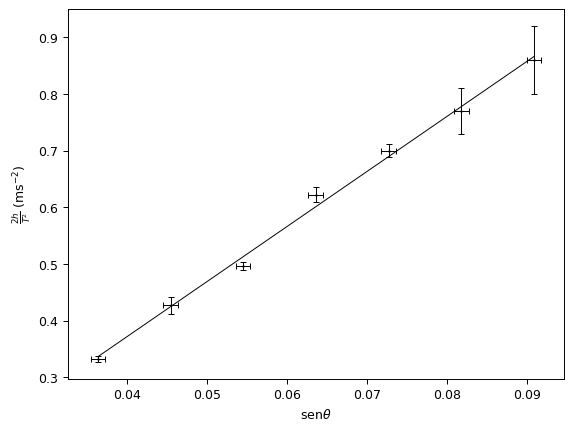

In [456]:
m, n, em, en, r = regresion(datosg['sen'], datosg['2ht2'])
plt.rcParams.update({'font.size': 9})
plt.rcParams['axes.linewidth'] = 0.7
plt.rcParams['xtick.major.width'] = 0.7
plt.rcParams['ytick.major.width'] = 0.7
plt.ylabel('$\\frac{2h}{T^2}$ (ms$^{-2}$)')
plt.xlabel('sen$\\theta$')
mm = min(datosg['sen'])
MM = max(datosg['sen'])
plt.plot([mm, MM], [m*mm+n, m*MM+n], color='black', linewidth=0.7)
plt.errorbar(datosg['sen'], datosg['2ht2'], xerr=datosg['esen'], yerr=datosg['e2ht2'], ls='none', capsize = 2, elinewidth=0.7, ecolor='black', capthick=0.7)
plt.scatter(datosg['sen'], datosg['2ht2'], s=0.6, c='black', marker='8')
plt.savefig('D:/Latex/UNED/Primer curso/Tecnicas experimentales/carril/figures/regresión1.png', dpi=1000, bbox_inches='tight')
plt.show()

In [457]:
rd(m, em)

('9.7', '0.3')

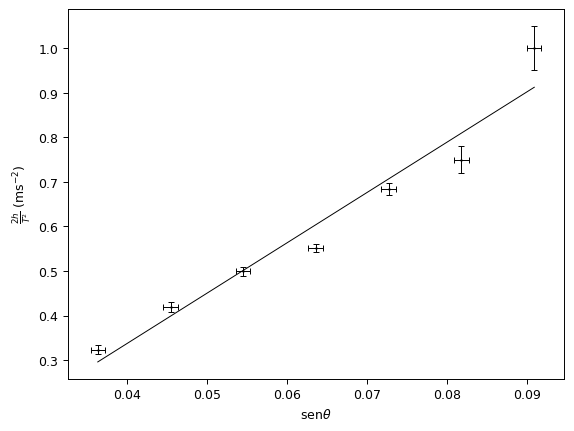

In [458]:
m, n, em, en, r = regresion(datosg['sen'], datosg['2ht2c'])
plt.rcParams.update({'font.size': 9})
plt.rcParams['axes.linewidth'] = 0.7
plt.rcParams['xtick.major.width'] = 0.7
plt.rcParams['ytick.major.width'] = 0.7
plt.ylabel('$\\frac{2h}{T^2}$ (ms$^{-2}$)')
plt.xlabel('sen$\\theta$')
mm = min(datosg['sen'])
MM = max(datosg['sen'])
plt.plot([mm, MM], [m*mm+n, m*MM+n], color='black', linewidth=0.7)
plt.errorbar(datosg['sen'], datosg['2ht2c'], xerr=datosg['esen'], yerr=datosg['e2ht2c'], ls='none', capsize = 2, elinewidth=0.7, ecolor='black', capthick=0.7)
plt.scatter(datosg['sen'], datosg['2ht2c'], s=0.6, c='black', marker='8')
plt.savefig('D:/Latex/UNED/Primer curso/Tecnicas experimentales/carril/figures/regresión2.png', dpi=1000, bbox_inches='tight')
plt.show()

In [459]:
rd(m, em)

('11.3', '1.2')

In [460]:
k1 = 17.4
ek1 = 0.3
k2 = 18.1
ek2 = 0.3

In [464]:
div = 1/(1/k1 + 1/k2)
print(rd(div, 2*div*math.sqrt(ek1**2/k1**4 + ek2**2/k2**4)))
print(rd(k1+k2, math.sqrt(ek1**2 + ek2**2)))

('8.87', '0.02')
('35.5', '0.4')
